In [1]:
import yaml

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
pr_input_dict = {
    'mean': '/g/data/ia39/npcp/code/results/figures/mean_bias_pr.yaml',
    'cycle': '/g/data/ia39/npcp/code/results/figures/seasonal_cycle_pr.yaml'
}

tasmin_input_dict = {
    'mean': '/g/data/ia39/npcp/code/results/figures/mean_bias_tasmin.yaml',
    'cycle': '/g/data/ia39/npcp/code/results/figures/seasonal_cycle_tasmin.yaml'
}

tasmax_input_dict = {
    'mean': '/g/data/ia39/npcp/code/results/figures/mean_bias_tasmax.yaml',
    'cycle': '/g/data/ia39/npcp/code/results/figures/seasonal_cycle_tasmax.yaml'
}

In [3]:
def mean_pct_change(df):
    """Calculate the average percentage change"""
    
    df_pct_change = ((df - df.loc['RCM']) / df.loc['RCM']) * 100
    
    return df_pct_change.mean(axis=1)
    

def read_data(index, infile):
    """Read index data"""

    with open(infile, 'r') as reader:
        mae_dict = yaml.load(reader, Loader=yaml.BaseLoader)
        
    hist_df = pd.DataFrame.from_dict(mae_dict['historical']).astype('float')
    xval_df = pd.DataFrame.from_dict(mae_dict['xvalidation']).astype('float')
    
    return hist_df, xval_df

In [4]:
def var_df(var_input_dict):
    """Get DataFrame for a given variable"""

    hist_mean_ds_list = []
    xval_mean_ds_list = []
    hist_pct_change_ds_list = []
    xval_pct_change_ds_list = []
    index_list = []
    for index, infile in var_input_dict.items():
        hist_df, xval_df = read_data(index, infile)
        hist_mean_ds_list.append(hist_df.mean(axis=1))
        xval_mean_ds_list.append(xval_df.mean(axis=1))
        hist_pct_change_ds_list.append(mean_pct_change(hist_df))
        xval_pct_change_ds_list.append(mean_pct_change(xval_df))
        index_list.append(index)

    hist_mean_df = pd.DataFrame(hist_mean_ds_list, index=index_list)
    xval_mean_df = pd.DataFrame(xval_mean_ds_list, index=index_list)
    hist_pct_change_df = pd.DataFrame(hist_pct_change_ds_list, index=index_list)
    xval_pct_change_df = pd.DataFrame(xval_pct_change_ds_list, index=index_list)

    hist_column_order = ['GCM', 'RCM', 'ECDFm', 'QME', 'MRNBC', 'MBCn']
    xval_column_order = ['GCM', 'RCM', 'ECDFm', 'QME', 'QDC', 'MRNBC', 'MBCn', 'training']
    hist_mean_df = hist_mean_df[hist_column_order]
    xval_mean_df = xval_mean_df[xval_column_order]
    hist_pct_change_df = hist_pct_change_df[hist_column_order]
    xval_pct_change_df = xval_pct_change_df[xval_column_order]
    
    df_dict = {
        'hist_mean': hist_mean_df[hist_column_order],
        'xval_mean': xval_mean_df[xval_column_order],
        'hist_pct_change': hist_pct_change_df[hist_column_order],
        'xval_pct_change': xval_pct_change_df[xval_column_order],
    }
    
    return df_dict

In [ ]:
pr_df_dict = var_df(pr_input_dict)

In [ ]:
tasmin_df_dict = var_df(tasmin_input_dict)

In [ ]:
tasmax_df_dict = var_df(tasmax_input_dict)

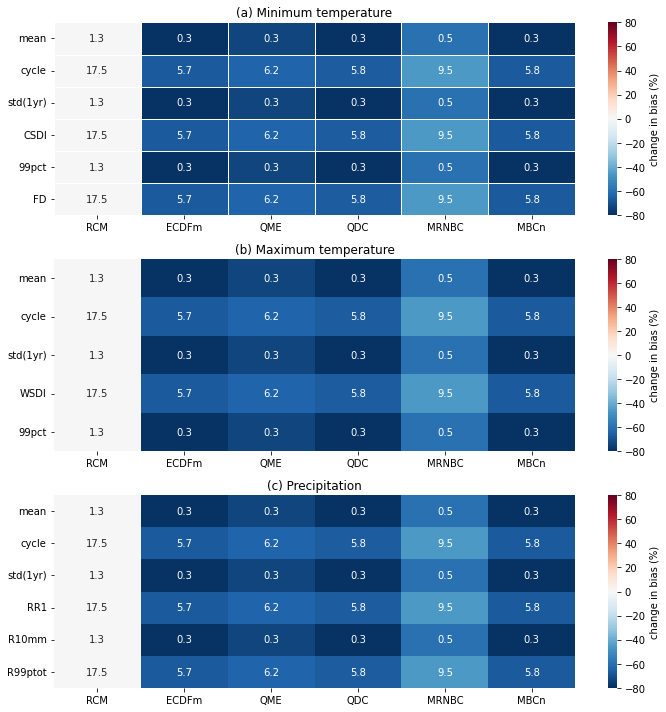

In [89]:
fig = plt.figure(figsize=[10, 10])
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# tasmin
g1 = sns.heatmap(
    tasmin_df_dict['hist_pct_change'],
    ax=ax1,
    annot=tasmin_df_dict['hist_mean'],
    fmt=".1f",
    cbar_kws={'label': 'mean change in bias (%)'},
    vmin=-100,
    vmax=100,
    cmap='RdBu_r',
    linewidths=0.5,
)
g1.set_yticklabels(g1.get_yticklabels(), rotation=0)
ax1.set_title('(a) Minimum temperature')

# tasmax
g2 = sns.heatmap(
    tasmax_df_dict['hist_pct_change'],
    ax=ax2,
    annot=tasmax_df_dict['hist_mean'],
    fmt=".1f",
    cbar_kws={'label': 'mean change in bias (%)'},
    vmin=-100,
    vmax=100,
    cmap='RdBu_r',
)
g2.set_yticklabels(g2.get_yticklabels(), rotation=0)
ax2.set_title('(b) Maximum temperature')

# Pr
g3 = sns.heatmap(
    pr_df_dict['hist_pct_change'],
    ax=ax3,
    annot=pr_df_dict['hist_mean'],
    fmt=".1f",
    cbar_kws={'label': 'mean change in bias (%)'},
    vmin=-100,
    vmax=100,
    cmap='RdBu_r',
)
g3.set_yticklabels(g3.get_yticklabels(), rotation=0)
ax3.set_title('(c) Precipitation')
fig.tight_layout()
plt.show()